# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Zomato data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df['online_order'].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [5]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])
df['rate'] = df['rate'].astype(np.float32)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float32
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float32(1), int64(2), object(4)
memory usage: 7.6+ KB


In [10]:
df_type = df.groupby("listed_in(type)")
VoteCount = df_type['votes'].sum()
print(VoteCount)

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


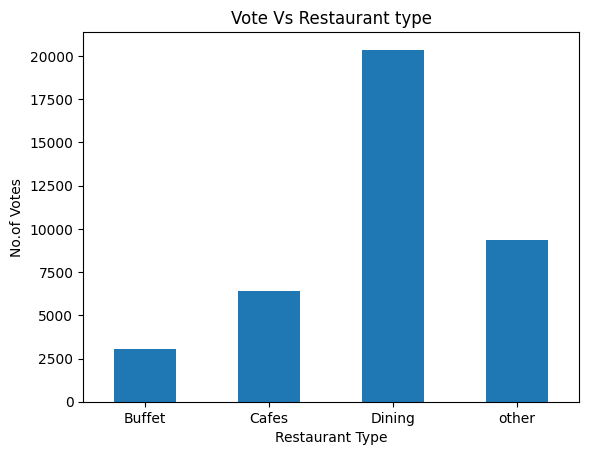

In [11]:
VoteCount.plot(kind='bar')
plt.title("Vote Vs Restaurant type")
plt.xlabel("Restaurant Type")
plt.ylabel('No.of Votes')
plt.xticks(rotation='horizontal')
plt.show()

Text(0.5, 0, 'Type Of Restaurant')

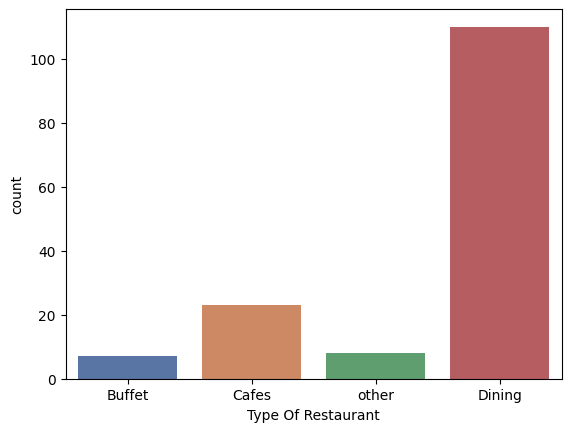

In [12]:
sns.countplot(x=df['listed_in(type)'],palette="deep")
plt.xlabel('Type Of Restaurant')

In [13]:
# Max Rating as per Restaurant
df_type = df.groupby("listed_in(type)")
avgRating = np.round(df_type['rate'].mean(),2)
print(avgRating)

listed_in(type)
Buffet    3.84
Cafes     3.77
Dining    3.57
other     3.91
Name: rate, dtype: float32


Text(0.5, 1.0, 'Rating Distribution over Restaurant Type')

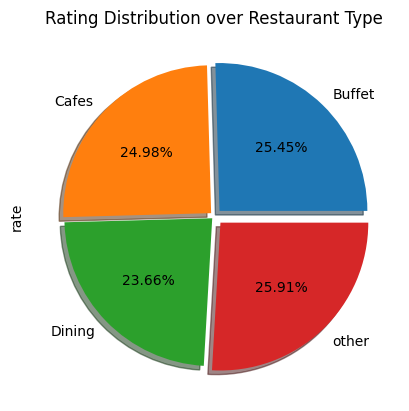

In [14]:
avgRating.plot(kind='pie',autopct="%.2f%%",shadow=True,explode=[0.05,0.03,0.02,0.06])
plt.title('Rating Distribution over Restaurant Type')

(array([10., 30., 44., 51., 13.]),
 array([2.5999999 , 3.        , 3.39999986, 3.79999995, 4.19999981,
        4.5999999 ]),
 <BarContainer object of 5 artists>)

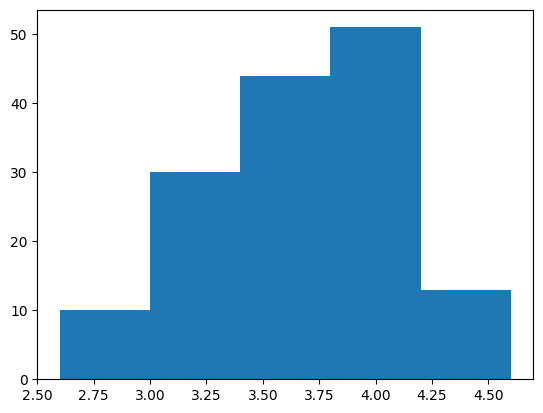

In [15]:
plt.hist(df['rate'],bins=5)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

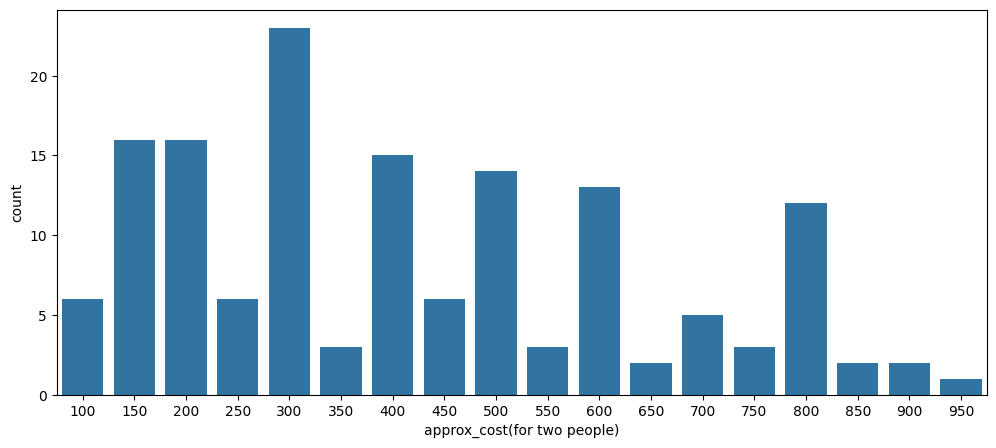

In [16]:
# Average order spending by couples
plt.figure(figsize=(12,5))
sns.countplot(x=df['approx_cost(for two people)'])

In [17]:
df['online_order'] = df['online_order'].map({'Yes':1,'No':0})
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Yes,4.1,775,800,Buffet
1,Spice Elephant,1,No,4.1,787,800,Buffet
2,San Churro Cafe,1,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7,88,300,Buffet
4,Grand Village,0,No,3.8,166,600,Buffet


online_order
0    4.3
1    4.6
Name: rate, dtype: float32


Text(0.5, 1.0, 'Max rating by order mode')

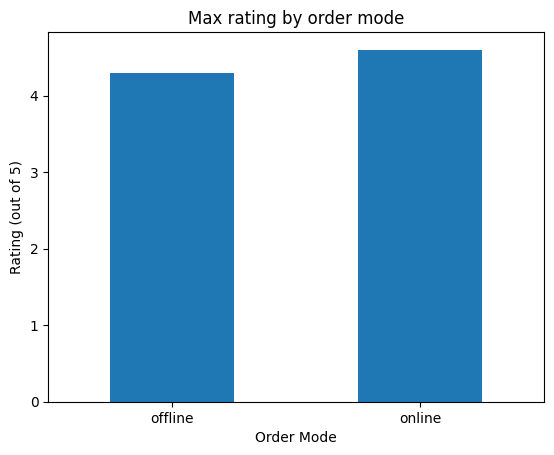

In [18]:
orderMode = df.groupby(['online_order'])['rate'].max()
print(orderMode)
orderMode.plot(kind='bar')
plt.xlabel('Order Mode')
plt.ylabel('Rating (out of 5)')
plt.xticks([0,1],['offline','online'],rotation=0)
plt.title('Max rating by order mode')

<Axes: xlabel='online_order', ylabel='rate'>

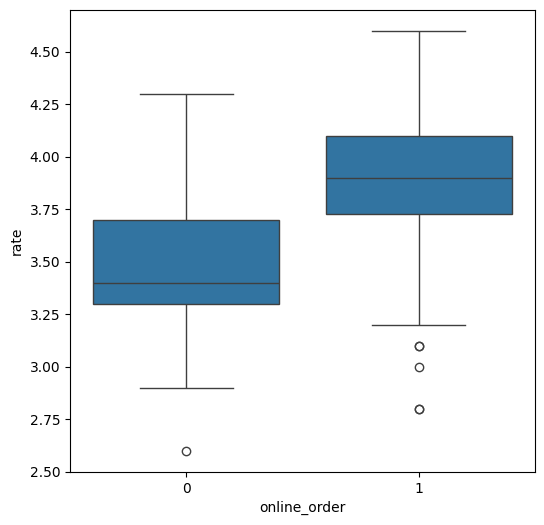

In [19]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order',y='rate',data = df)

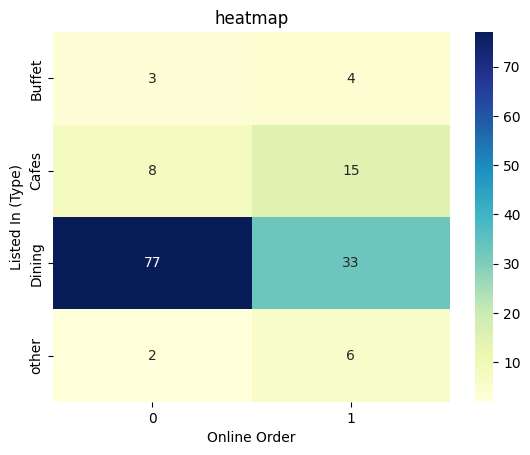

In [20]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc ='size',fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap="YlGnBu",fmt="d")
plt.title("heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()